# Analisis Penjualan Pie dengan Multiple Linear Regression

Pada kesempatan kali ini, akan dilakukan analisis penjualan *pie* dari sebuah toko. Data yang disediakan toko tersebut berupa jumlah penjualan, kuantifikasi harga, dan kuantifikasi iklan.

In [35]:
# pertama, kita import library yang dibutuhkan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn import metrics

In [18]:
# kita read data dari csv yang sudah disediakan
# karena di csv antara tiap kolom dipisahkan dengan ;, kita tuliskan sep=';'
df = pd.read_csv('pie-sales.csv', sep=';')
df.head()

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0


Setelah melihat data secara sekilas, kita dapat berhipotesis bahwa variabel yang mempengaruhi penjualan (*pie_sales*) adalah harga (*price*) dan iklan (*advertising*). Pekan penjualan (*week*) tampaknya tidak terlalu berpengaruh. Untuk itu,kita *drop* kolom *week*, kemudian kita lakukan **pairplot** untuk melihat hubungan antar variabel.

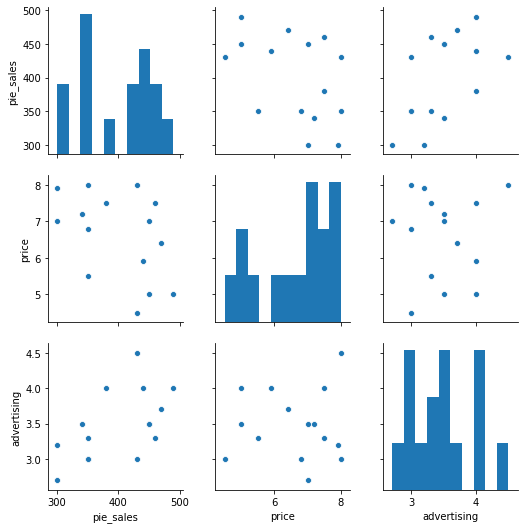

In [19]:
df.drop('week', axis=1, inplace= True)
sns.pairplot(df)

Dari hasil *pairplot* di atas, khususnya di bagian atas tengah dan atas kanan, merupakan plot yang menunjukkan korelasi antara *price* dengan *pie_sales* dan *advertising* dengan *pie_sales*. Lantas, apa yang akan terjadi jika kita buat *single linear regression* antara *pie_sales* dan *price* saja?

## Hubungan Harga dan Penjualan

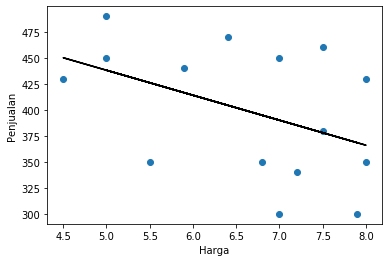

In [30]:
Xprice = df[['price']]
Y = df[['pie_sales']]
reg_price = linear_model.LinearRegression()
reg_price.fit(Xprice, Y)
plt.scatter(Xprice, Y)
plt.plot(Xprice, reg_price.predict(Xprice), color = "black")
plt.xlabel('Harga')
plt.ylabel('Penjualan')
plt.show()

Di atas, dapat dilihat hasil *single linear regression* untuk harga dan penjualan. Untuk mengetahui seberapa baiknya model buatan kita, mari kita cek *Root Mean Squared Error* dan *R-squared* dari model yang telah kita buat tersebut.

In [31]:
X_price_pred = reg_price.predict(Xprice)

In [37]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(Y, X_price_pred)))
print('R^2:',metrics.r2_score(Y, X_price_pred))

RMSE:  55.01084456895846
R^2: 0.19649111453531498


Dari nilai RMSE, dapat dilihat bahwa akar dari MSE nilainya **55**. Baik atau buruknya angka ini merupakan hal yang relatif. Yang jelas, semakin mendekati 0 akan lebih baik. Untuk itu, perlu dibandingkan dengan model selanjutnya. Selain itu, dari *R-squared*, didapatkan nilainya **0.196**. Angka ini cukup buruk, karena artinya relasi linear antara kedua variabel sangat rendah. Sebagai perbandingan, mari kita buat single linear regression antara periklanan dan penjualan.

## Hubungan Periklanan dan Penjualan

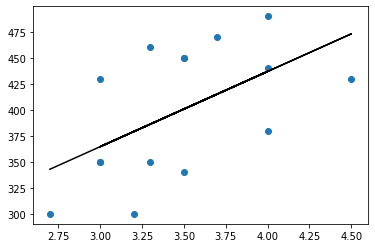

In [38]:
Xadv = df[['advertising']]
Y = df[['pie_sales']]
reg_adv = linear_model.LinearRegression()
reg_adv.fit(Xadv, y)
plt.scatter(Xadv, y)
plt.plot(Xadv, reg_adv.predict(Xadv), color = "black")
plt.show()

Seperti pada model sebelumnya, mari kita cari RMSE dan R-squared.

In [39]:
X_adv_pred = reg_adv.predict(Xadv)

In [41]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(Y, X_adv_pred)))
print('R^2:',metrics.r2_score(Y, X_adv_pred))

RMSE:  50.9961507340146
R^2: 0.30949178347955386


Nilai RMSE model kedua kita memiliki nilai yang lebih rendah dari model pertama, yaitu **50.99**. Sementara, *R-squared*nya juga lebih tinggi, yaitu **0.309**. Artinya, model ini sedikit lebih baik dibandingkan model pertama. Maka, dalam memprediksi hasil penjualan, variabel periklanan lebih berpengaruh dibandingkan variabel harga. Namun, kedua angka ini masih sangat jauh dari harapan kita. Untuk itu, kita coba melakukan regresi linear dengan 2 variabel dependen (harga dan iklan) dan kita periksa apakah hasilnya lebih baik daripada kedua model yang telah kita buat.

## Multiple Linear Regression

In [26]:
X = df[['price', 'advertising']]
X.head()

,price,advertising
0,5.5,3.3
1,7.5,3.3
2,8.0,3.0
3,8.0,4.5
4,6.8,3.0


In [42]:
reg = linear_model.LinearRegression()
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Untuk *multiple linear regression*, tidak disarankan menggunakan visualisasi karena agak sukar untuk membuat dan membaca visualisasi dalam bentuk 3 dimensi. Karena itu, pada model kali ini tidak ditampilkan hasil visualisasinya. Namun, kita tetap bisa mengecek hasil RMSE dan *R-squared*nya.

In [43]:
X_pred = reg.predict(X)
print('RMSE: ', np.sqrt(metrics.mean_squared_error(Y, X_pred)))
print('R^2:',metrics.r2_score(Y, X_pred))

RMSE:  42.45256683818261
R^2: 0.5214779360292288


Dari hasil RMSE dan *R-squared*, kita dapat melihat hasil yang jauh lebih baik. RMSE turun sekitar 8 poin menuju **42.45**, sementara *R-squared* sudah melebihi 0.5, yaitu **0.52**. Artinya, menggunakan kedua variabel ini untuk memprediksi penjualan jauh lebih baik dibandingkan hanya menggunakan 1 variabel saja. 

Sekarang setelah model terbaik kita sudah berhasil dibuat, kita dapat menyimpannya untuk menentukan strategi toko *pie* ini untuk senantiasa meningkatkan penjualan. Namun, bagaimana sebenarnya bentuk dari model kita?

In [54]:
koef = pd.DataFrame(reg.coef_)

print('Intercept: \n', reg.intercept_)
print('Price Coefficient: \n', koef[0][0])
print('Advertising Coefficient: \n', koef[1][0])

Intercept: 
 [306.52619328]
Price Coefficient: 
 -24.97508951782694
Advertising Coefficient: 
 74.13095748874098


Model regresi linear dua variabel yang telah kita buat dapat dituliskan dengan persamaan:

<div align="center">
${y} = a + bX_{1} + cX_{2}$
</div>

y = a + bx1 + cx2 dengan y adalah penjualan, **a** adalah *intercept*, **b** adalah koefisien harga, **X1** adalah harga, **c** adalah koefisien iklan, dan **X2** adalah iklan. Artinya, dengan nilai yang kita dapatkan di atas, model kita dapat ditulis dengan persamaan:

<div align="center">
${y} = 306.526 - 24.975X_{1} + 74.131X_{2}$
</div>

Dengan persamaan tersebut, kita dapat menghitung secara manual perkiraan penjualan. Namun tentu saja, untuk mendapatkan hasil yang lebih presisi dapat menggunakan **reg.predict** dengan nilai harga dan iklan yang ingin diprediksi berapa kira-kira penjualannya.

## Menggunakan Statsmodels

**Statsmodels** merupakan *library* yang menyediakan metode regresi linear selain scikit-learn. Pada *library* ini, terdapat fungsi **OLS** yang akan mengaplikasikan regresi linear model *Ordinary Least Squares* pada dataset kita. Yang menarik dari *Statsmodels* adalah memiliki fungsi **summary** yang dapat langsung menampilkan data-data yang kita butuhkan untuk menganalisis model kita.

In [56]:
import statsmodels.api as sm

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Sat, 24 Oct 2020   Prob (F-statistic):             0.0120
Time:                        10:05:19   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5262    114.254      2.683      

C:\Users\nitro\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\nitro\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


### R-squared

Seperti yang ditampilkan oleh tabel di atas, *R-squared* dari model OLS kita bernilai 0.521. Nilai ini serupa dengan model sebelumnya yang kita buat dengan *library* scikit-learn.

### Durbin-Watson

Durbin-Watson merupakan salah satu metode untuk menentukan apakah terjadi autokorelasi atau tidak. Jika terjadi autokorelasi, maka asumsi pada regresi linear menjadi tidak valid. dari URL [1], dapat ditampilkan tabel sebagai berikut.

![image](durbin-watson-table.webp "Durbin-Watson Table")

Karena data kita berjumlah 15 baris, maka n = 15. Kemudian, karena terdapat dua variabel independen, k = 2. dari tabel Durbin-Watson, didapatkan dL = **0.95** dan dU = **1.54**. Sementara nilai Durbin-Watson (D) dari tabel *summary* kita adalah 1.683. Untuk memastikan tidak terjadi autokorelasi, D harus berada di antara dL dan (4-dU). Karena 4 - dU = 2.46, dan 0.95 < D < 2.46, maka tidak terjadi autokorelasi dan asumsi regresi linear menjadi valid.

### F-test

F-test merupakan tes yang digunakan untuk mengecek signifikansi variabel independen kita terhadap variabel dependen. Sekiranya *p-value* dari model kita di bawah 0.05, artinya variabel yang kita pilih cukup signifikan untuk dijadikan variabel dependen dalam regresi linear.

In [63]:
print('F-stat:', model.fvalue)
print('p-value:', model.f_pvalue)

F-stat: 6.538606789020468
p-value: 0.012006372233186378


Berdasarkan nilai p-value di atas, dapat disimpulkan bahwa *price* dan *advertising* cocok digunakan untuk perhitungan regresi linear.

### t-Test

t-Test merupakan tes yang digunakan untuk menampilkan korelasi antara dua variabel. Serupa dengan F-test, Sekiranya *p-value* dari model kita di bawah 0.05, artinya variabel yang kita pilih cukup signifikan untuk dijadikan variabel dependen dalam regresi linear.

In [64]:
print(model.pvalues)

const          0.019932
price          0.039788
advertising    0.014494
dtype: float64


Karena *price* dan *advertising* nilai p-nya di bawah 0.05, artinya kedua variabel tersebut cocok digunakan untuk perhitungan regresi linear.

## Kesimpulan

Dari hasil regresi linear di atas, dapat disimpulkan bahwa penggunaan *multiple linear regression* dengan variabel *price* dan *advertising* lebih efektif digunakan dibandingkan *single linear regression* dengan salah satu variabel saja. Selain itu, dari hasil validasi dengan t-Test dan F-test, dapat dibuktikan bahwa kedua variabel tersebut memang layak digunakan untuk perhitungan regresi linear. Sementara degnan Durbin_Watson, dapat dibuktikan bahwa tidak terjadi autokorelasi sehingga regresi linear dapat digunakan.

### Daftar Pustaka

1. https://www.statisticshowto.com/wp-content/uploads/2016/06/durbin-watson-table.jpg
2. https://www.semanticscholar.org/paper/How-do-I-interpret-a-p-value-O'Brien-Osmond/e9f7b8583cabc24e73455f61b9288306c0e87e57
3. Telkom DTI 2020 - Modul 4: Regression - Dr. Nurvita Trianasari, S.Si, M.Stat.